# Valgrind e  Simulação de Cache: **Cachegrind**




Este laboratório apresenta o uso da ferramenta cachegrind do ambiente Valgrind, [para maiores informações consulte aqui](https://valgrind.org/docs/manual/cg-manual.html)

**Importante**: 
* A primeira execução do Cachegrind irá fazer a instalação da ferramenta e pode demorar um pouco mais. 
* Os laboratorios usam uma multiplicação de matrizes como exemplo. O tamanho da matriz cresce com  $O(N^2)$ e o tempo de execução com $O(N^3)$.
* Os exemplos estão em C. Mas o Cachegrind trabalha sobre o executável e pode ser usado em qualquer binário. 
* Fique a vontade para contribuir.


## Inicialização

Primeiro, configurar o laboratório.

In [2]:
!pip install git+git://github.com/canesche/nvcc4jupyter.git
!git clone https://github.com/canesche/nvcc4jupyter
%load_ext nvcc_plugin

  Cloning git://github.com/canesche/nvcc4jupyter.git to /tmp/pip-req-build-5kgmyys8
  Running command git clone -q git://github.com/canesche/nvcc4jupyter.git /tmp/pip-req-build-5kgmyys8
  Created wheel for ColabPlugin: filename=ColabPlugin-blind-cp36-none-any.whl size=12717 sha256=45a50d98c1a6e0ccb24aeed193379cb011052a3be3f6520bc792404cb6f29228
  Stored in directory: /tmp/pip-ephem-wheel-cache-8rj_62i7/wheels/87/ae/09/21c6e192181a0472e20ddd1d5212e2cbb113f00ebe14330d0d
Successfully built ColabPlugin
Cloning into 'nvcc4jupyter'...
remote: Enumerating objects: 362, done.
remote: Counting objects: 100% (362/362), done.
remote: Compressing objects: 100% (271/271), done.
remote: Total 1147 (delta 100), reused 328 (delta 74), pack-reused 785
Receiving objects: 100% (1147/1147), 35.71 MiB | 17.60 MiB/s, done.
Resolving deltas: 100% (554/554), done.


# Specify all cache parameters

A extensão **\%\%cachegrind** é semelhante a linha de comando, importante que os tamanhos de cache devem ser potência de 2, a linha além de potência de 2 começa com 32 bytes. A ordem dos parametros é tamanho da cache, associatividade e tamanho da linha. Os flags para cache de dados, de instruções e de último nível são **D1**, **I1**, and **LL**, respectivamente.

In [30]:
%%cachegrind --D1=32768,8,32 --I1=32768,2,32 --LL=65536,2,32 --file
#include <stdio.h>
#include <stdlib.h>
#define n 1000

int main(int argc, char const *argv[]) {
  
  int i, j;
  int x[n][n];
  for (i = 0; i < n; i++) {
    for (j = 0; j < n; j++) {
      x[j][i] = i + j; }
  }

}


I1  misses:         3,641
LLi misses:         3,470
I1  miss rate:       0.02%
LLi miss rate:       0.02%

D   refs:       8,207,509  (6,774,977 rd   + 1,432,532 wr)
D1  misses:       181,897  (   23,358 rd   +   158,539 wr)
LLd misses:       173,438  (   20,791 rd   +   152,647 wr)
D1  miss rate:        2.2% (      0.3%     +      11.1%  )
LLd miss rate:        2.1% (      0.3%     +      10.7%  )

LL refs:          185,538  (   26,999 rd   +   158,539 wr)
LL misses:        176,908  (   24,261 rd   +   152,647 wr)
LL miss rate:         0.7% (      0.1%     +      10.7%  )


## Atenção aos resultados 

Valgrind quando simula a cache ele também simula a inicialização do sistema.
Portanto, quando for utilizar o valgrind esteja ciente que se o seu código for muito simples será mascarado pela inicialização do sistema.

In [29]:
%%cachegrind --D1=1024,8,32 --I1=32768,2,32 --LL=65536,2,32 --file

int main(int argc, char const *argv[]) {
  //# empty code
}


I1  misses:        3,635
LLi misses:        3,509
I1  miss rate:      0.09%
LLi miss rate:      0.09%

D   refs:      1,203,059  (771,626 rd   + 431,433 wr)
D1  misses:      284,855  (219,932 rd   +  64,923 wr)
LLd misses:       47,873  ( 21,065 rd   +  26,808 wr)
D1  miss rate:      23.7% (   28.5%     +    15.0%  )
LLd miss rate:       4.0% (    2.7%     +     6.2%  )

LL refs:         288,490  (223,567 rd   +  64,923 wr)
LL misses:        51,382  ( 24,574 rd   +  26,808 wr)
LL miss rate:        1.0% (    0.5%     +     6.2%  )


### RESULTADOS DOS ALGORITMOS

In [31]:
%%cachegrind --D1=1024,8,32 --I1=32768,2,32 --LL=65536,2,32 --file
#include <stdio.h>
#include <stdlib.h>
#define n 1000

int main(int argc, char const *argv[]) {
  
  int i, j;
  int x[n][n];
  for (i = 0; i < n; i++) {
    for (j = 0; j < n; j++) {
      x[j][i] = i + j; }
  }

}


I1  misses:         3,641
LLi misses:         3,516
I1  miss rate:       0.02%
LLi miss rate:       0.02%

D   refs:       8,207,509  (6,774,977 rd   + 1,432,532 wr)
D1  misses:     1,287,382  (  222,590 rd   + 1,064,792 wr)
LLd misses:       174,062  (   21,315 rd   +   152,747 wr)
D1  miss rate:       15.7% (      3.3%     +      74.3%  )
LLd miss rate:        2.1% (      0.3%     +      10.7%  )

LL refs:        1,291,023  (  226,231 rd   + 1,064,792 wr)
LL misses:        177,578  (   24,831 rd   +   152,747 wr)
LL miss rate:         0.7% (      0.1%     +      10.7%  )


In [33]:
%%cachegrind --D1=1024,8,32 --I1=32768,2,32 --LL=65536,2,32 --file
#include <stdio.h>
#include <stdlib.h>

#define n 1000

int main(int argc, char const *argv[]) {
  int i, j;
  int x[n][n];
  for (j=0; j<n; j++) {
    int *p = x[j];
    for (i=0; i<n; i++) {
      *p++ = i+j;
    }
  }
}


I1  misses:         3,642
LLi misses:         3,517
I1  miss rate:       0.02%
LLi miss rate:       0.02%

D   refs:       8,209,509  (5,775,977 rd   + 2,433,532 wr)
D1  misses:       412,380  (  222,590 rd   +   189,790 wr)
LLd misses:       173,012  (   21,315 rd   +   151,697 wr)
D1  miss rate:        5.0% (      3.9%     +       7.8%  )
LLd miss rate:        2.1% (      0.4%     +       6.2%  )

LL refs:          416,022  (  226,232 rd   +   189,790 wr)
LL misses:        176,529  (   24,832 rd   +   151,697 wr)
LL miss rate:         0.8% (      0.1%     +       6.2%  )


### Processando os dados: **Algortimo simples X Algoritmo otimizado**

Note que a cache de dados teve maiores valores na matriz otimizada:

* Algoritmo simples: 8,207,509
* Algortimo otimizado:   8,209,509

Contudo as falhas na matriz otimizada foram menores:

* Algortimo simples: 15.7%
* Algortimo otimizado:   5%

Logo, quanto menos falha na cache L1 melhor.

Isso comprova que o algoritmo otimizado realmente é melhor, apesar de ambos fazerem a mesma coisa a utilização de ponteiros otimizou muito a aplicação do programa.

# Variando o tamanho da Cache e visualizando falhas e taxa de falhas

A extensão **\%\%rangecachegrind** executa várias vezes com tamanhos de cache especificados pela lista **datacache=(4,8,16,32)**, em Kbytes. O usuário especifica a associatividade (**ways**) e o tamanho do linha  (**line**), os gráficos são gerados de forma automática.

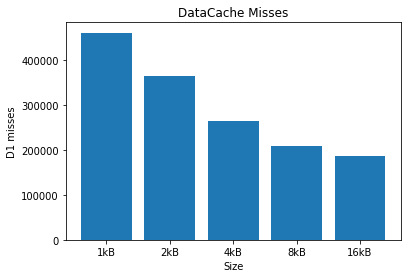

In [34]:
%%rangecachegrind datacache=(1,2,4,8,16); ways=2; line=32; bargraph=(misses)

#include <stdio.h>
#include <stdlib.h>

#define n 1000

int main(int argc, char const *argv[]) {
  int i, j;
  int x[n][n];
  for (j=0; j<n; j++) {
    int *p = x[j];
    for (i=0; i<n; i++) {
      *p++ = i+j;
    }
  }
}

# Tarefa

Variando os valores da cache de dados, ways e a lines (Utilize criatividade para mostrar )

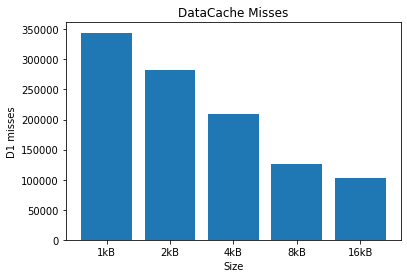

In [36]:
%%rangecachegrind datacache=(1,2,4,8,16); ways=4; line=64; bargraph=(misses)

#include <stdio.h>
#include <stdlib.h>

#define n 1000

int main(int argc, char const *argv[]) {
  int i, j;
  int x[n][n];
  for (j=0; j<n; j++) {
    int *p = x[j];
    for (i=0; i<n; i++) {
      *p++ = i+j;
    }
  }
}

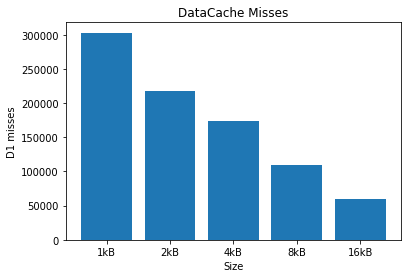

In [38]:
%%rangecachegrind datacache=(1,2,4,8,16); ways=8; line=128; bargraph=(misses)

#include <stdio.h>
#include <stdlib.h>

#define n 1000

int main(int argc, char const *argv[]) {
  int i, j;
  int x[n][n];
  for (j=0; j<n; j++) {
    int *p = x[j];
    for (i=0; i<n; i++) {
      *p++ = i+j;
    }
  }
}

# Explicação dos resultados

Como podemos ver nos gráficos acima observamos que conforme aumentamos os valores **ways** e **line** a quantidade de misses diminui, o que faz sentido levando em consideração a matéria que aprendemos na disciplina 